# Clustering via $k$-Means and DBSCAN

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans, DBSCAN


## $k$-Means Clustering

### Toy example from lecture

C:\Users\leoxi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


kmeans.labels_=[2 2 2 0 0 0 1 1]
kmeans.cluster_centers_=[[2.33333333 3.33333333]
 [3.5        0.        ]
 [0.66666667 1.66666667]]


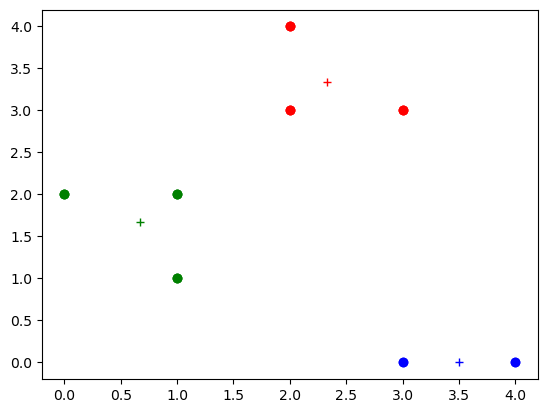

In [5]:
X = np.array([(0,2), (1,1), (1,2), (2,3), (2,4), (3,3), (3,0), (4,0)])
kmeans = KMeans(n_clusters=3, n_init=10, random_state=0)
kmeans.fit(X)
print(f'kmeans.labels_={kmeans.labels_}') # cluster IDs, not digit labels
print(f'kmeans.cluster_centers_={kmeans.cluster_centers_}')
colors = {0:'red', 1:'blue', 2:'green'}
for label in kmeans.labels_:
    keep_row = (kmeans.labels_ == label)
    plt.plot(X[keep_row, 0], X[keep_row, 1], marker='o', linestyle='none', color=colors[label])
k = kmeans.cluster_centers_.shape[0]
for i in range(k):
    plt.plot(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], marker='+', linestyle='none', color=colors[i])



### Try clustering digits (from $\mathbf{x}=$ 8x8 image, ignoring $y=$ digit label).
Check whether clusters correspond to labels.


In [7]:
digits = load_digits() # reset the data (unnecessary) for clarity
X = digits.data
y = digits.target

# Where did I get the n_clusters=10? Cheating! I know these are
# images of 10 digits, but normal clustering is on unlabeled data.
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)
N = X.shape[0]
kmeans.fit(X)
print(f'kmeans.labels_={kmeans.labels_}') # cluster IDs, not digit labels
#print(f'kmeans.cluster_centers_={kmeans.cluster_centers_}')

kmeans.labels_=[0 1 1 ... 1 8 8]


C:\Users\leoxi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.
  warnings.warn(


In [8]:
# Confirm that '.labels_' gives the same values '.predict()' called on training data.
clusterIDs = kmeans.predict(X) # cluster IDs, not digit labels
assert np.all(clusterIDs == kmeans.labels_) # since I called .predict() on the training X
print(f'clusterIDs={clusterIDs}')

clusterIDs=[0 1 1 ... 1 8 8]


These IDs don't mean anything to me. However, since we clustered images
that have $y$ labels (even though $k$-means didn't see the labels)
let's inspect the $y$ labels in each cluster and visualize the centroids.


i=0, values=[0 2 6], counts=[176   1   1]
i=1, values=[1 2 3 4 6 7 8 9], counts=[100   8   7   2   3   2 100   1]
i=2, values=[2 3 4 7 8 9], counts=[  3   7  11 174   5   8]
i=3, values=[1 2 4 7 8 9], counts=[54  2  3  2  6 20]
i=4, values=[1 2 3 5 8 9], counts=[  1  13 154   2   2   6]
i=5, values=[1 5 6 8], counts=[  2   1 177   2]
i=6, values=[0 4 5], counts=[  2 165   2]
i=7, values=[1 3 5 7 8 9], counts=[  1   2 136   1   4   6]
i=8, values=[2 3 5 8 9], counts=[  2  13  41  52 139]
i=9, values=[1 2 8], counts=[ 24 148   3]


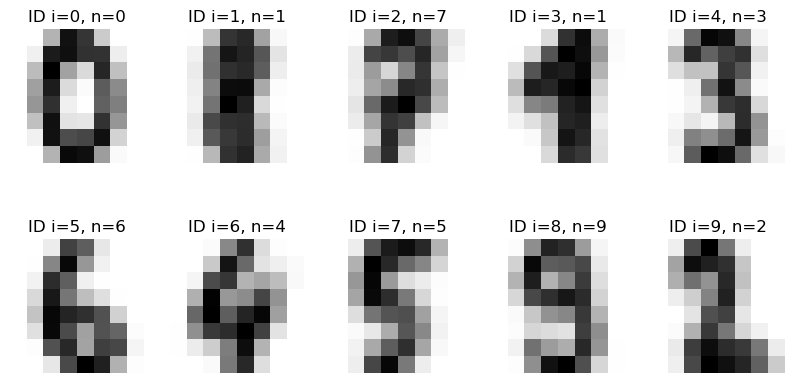

In [10]:
fig = plt.figure(figsize=(10, 5)) # new blank figure
gs = fig.add_gridspec(nrows=2, ncols=5) # grid of plot axes
for i in np.arange(10): # for each cluster ID
    clusterMembers = y[clusterIDs == i]
    values, counts = np.unique(ar=clusterMembers, return_counts=True)
    print(f'i={i}, values={values}, counts={counts}')
    ax = fig.add_subplot(gs[i // 5, i % 5])
    ax.imshow(kmeans.cluster_centers_[i].reshape(8, 8), cmap='binary')
    ax.set_axis_off()
    plt.title(f'ID i={i}, n={values[np.argmax(counts)]}')


Again, remember that clustering is normally done on unlabeled data, not on these
labeled images of digits; and remember that I cheated to choose $k=10$.

### DBSCAN: toy example from lecture:
first try $k$-means, then try DBSCAN

C:\Users\leoxi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


kmeans.labels_=[0 1 1 1 0 0 0 0 0 1 1 1 1 1 1]
kmeans.cluster_centers_=[[1.75       0.25      ]
 [1.77777778 3.        ]]


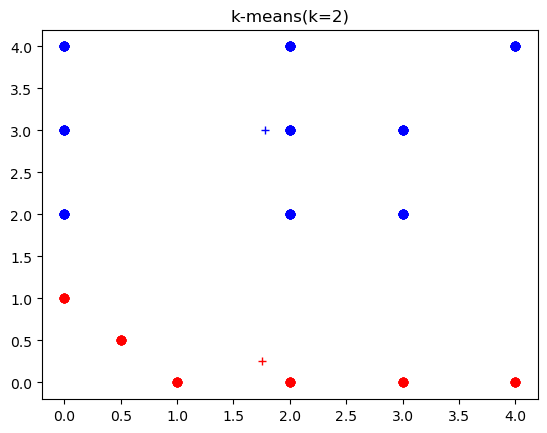

db.labels_=[ 0  0  0  0  0  0  0  0  0  1  1  1  1  1 -1]


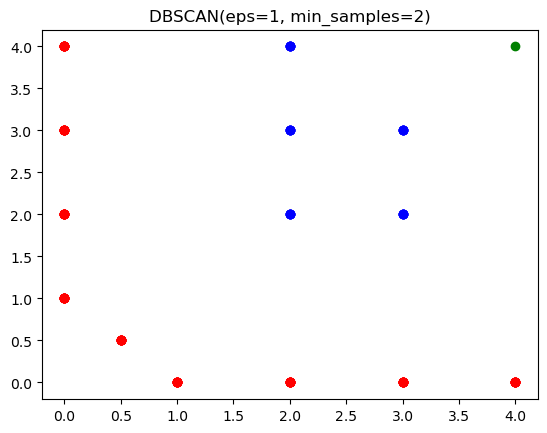

In [13]:
X = np.array([(0,1), (0,2), (0,3), (0,4),
              (.5,.5),
              (1,0), (2,0), (3,0), (4,0),
              (2,2), (2,3), (2,4), (3,2), (3,3), (4,4)])
kmeans = KMeans(n_clusters=2, n_init=10, random_state=0)
kmeans.fit(X)
print(f'kmeans.labels_={kmeans.labels_}') # cluster IDs, not digit labels
print(f'kmeans.cluster_centers_={kmeans.cluster_centers_}')
colors = {0:'red', 1:'blue'}
for label in kmeans.labels_:
    keep_row = (kmeans.labels_ == label)
    plt.plot(X[keep_row, 0], X[keep_row, 1], marker='o', linestyle='none', color=colors[label])
k = kmeans.cluster_centers_.shape[0]
for i in range(k):
    plt.plot(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], marker='+', linestyle='none', color=colors[i])
plt.title('k-means(k=2)')
plt.show(block=False)
db = DBSCAN(eps=1, min_samples=2)
db.fit(X)
print(f'db.labels_={db.labels_}') # cluster IDs, not digit labels
colors = {0:'red', 1:'blue', -1:'green'}
for label in db.labels_:
    keep_row = (db.labels_ == label)
    plt.plot(X[keep_row, 0], X[keep_row, 1], marker='o', linestyle='none', color=colors[label])
plt.title('DBSCAN(eps=1, min_samples=2)')
plt.show(block=False)
